# Análise de Dados dos Pinguins

Este notebook contém análises sobre uma base de dados de pinguins, incluindo informações sobre espécie, ilha de origem, medidas corporais e sexo dos animais.

## 1. Importação das Bibliotecas

Primeiro, vamos importar todas as bibliotecas necessárias para nossa análise.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuração para melhor visualização dos gráficos
plt.style.use('default')
sns.set_palette("husl")

## 2. Carregamento dos Dados

A base de dados contém informações sobre pinguins, incluindo características como espécie, tamanho e outras medidas corporais.

In [58]:
# Importando a base de dados
df_pinguins = pd.read_csv('penguins.csv')

# Visualizando as primeiras linhas dos dados
print("Primeiras 5 linhas do dataset:")
display(df_pinguins.head())

print(f"\nShape do dataset: {df_pinguins.shape}")
print(f"Colunas: {list(df_pinguins.columns)}")

Primeiras 5 linhas do dataset:


,Espece,Ilha,largura do bico,profundidade do bico,largura da barbata,massa corporal,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female



Shape do dataset: (344, 7)
Colunas: ['Espece', 'Ilha', 'largura do bico', 'profundidade do bico', 'largura da barbata', 'massa corporal', 'sexo']


## 3. Análise 1: Pinguins sem Anotações

Vamos identificar quais pinguins não têm anotações completas (dados nulos).

In [59]:
def linhas_com_dados_nulos(df):
    lista_nulo = []
    for i, coluna in df.iterrows():
        if coluna.isnull().any():
            lista_nulo.append(i)
    print(f"1 - As linhas {lista_nulo} contém dados nulos (As linhas iniciam pelo número 0).")
    return lista_nulo

linhas_nulas = linhas_com_dados_nulos(df_pinguins)

# Visualização adicional dos dados nulos
print(f"\nTotal de linhas com dados nulos: {len(linhas_nulas)}")
print(f"Porcentagem de dados nulos: {len(linhas_nulas)/len(df_pinguins)*100:.2f}%")


1 - As linhas [3, 8, 9, 10, 11, 47, 178, 218, 256, 268, 271] contém dados nulos (As linhas iniciam pelo número 0).

Total de linhas com dados nulos: 11
Porcentagem de dados nulos: 3.20%


## 4. Análise 2: Distribuição por Ilhas

Vamos analisar de quais ilhas a maioria dos pinguins está vindo.

2 - As ilhas mais frequentes são Biscoe com 168 ocorrências, seguida por Dream com 124 ocorrências e Torgersen com 52 ocorrências.


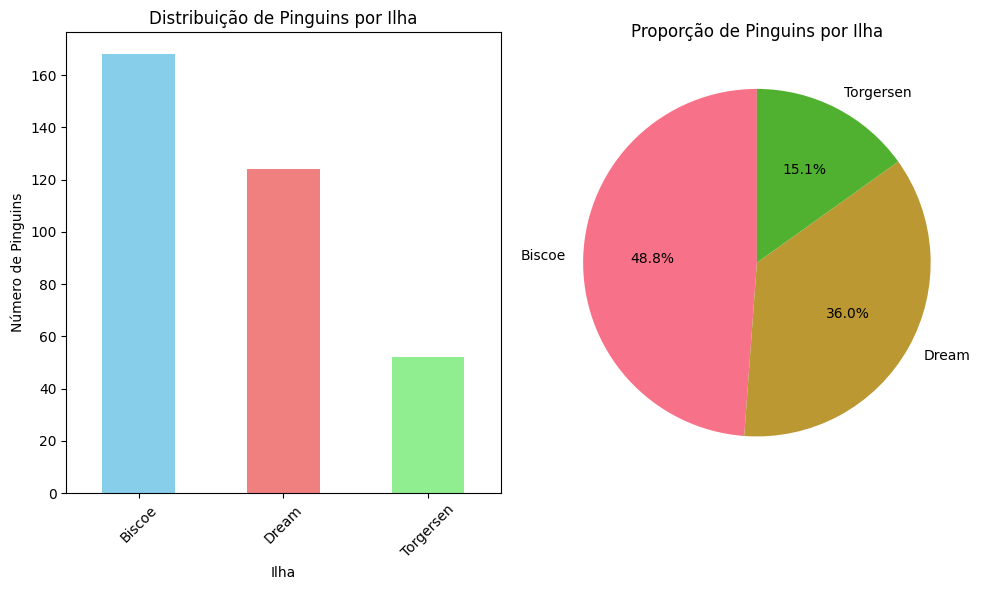

In [60]:
def ilhas_mais_frequentes(df):
    ilhas = df['Ilha'].value_counts()
    print(f"2 - As ilhas mais frequentes são {ilhas.index[0]} com {ilhas.values[0]} ocorrências, seguida por {ilhas.index[1]} com {ilhas.values[1]} ocorrências e {ilhas.index[2]} com {ilhas.values[2]} ocorrências.")
    return ilhas

distribuicao_ilhas = ilhas_mais_frequentes(df_pinguins)

# Visualização gráfica
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
distribuicao_ilhas.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribuição de Pinguins por Ilha')
plt.xlabel('Ilha')
plt.ylabel('Número de Pinguins')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(distribuicao_ilhas.values, labels=distribuicao_ilhas.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Pinguins por Ilha')

plt.tight_layout()
plt.show()

## 5. Análise 3: Distribuição por Espécies

Vamos identificar quais são as espécies que a ONG mais possui.

3 - As espécies que a ONG mais possui são as espécies Adelie com 152 animais, seguida por Gentoo com 124 animais e Chinstrap com 68 animais.


C:\Users\gui3d\AppData\Local\Temp\ipykernel_1468\1954202527.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pinguins, x='Espece', palette='viridis')


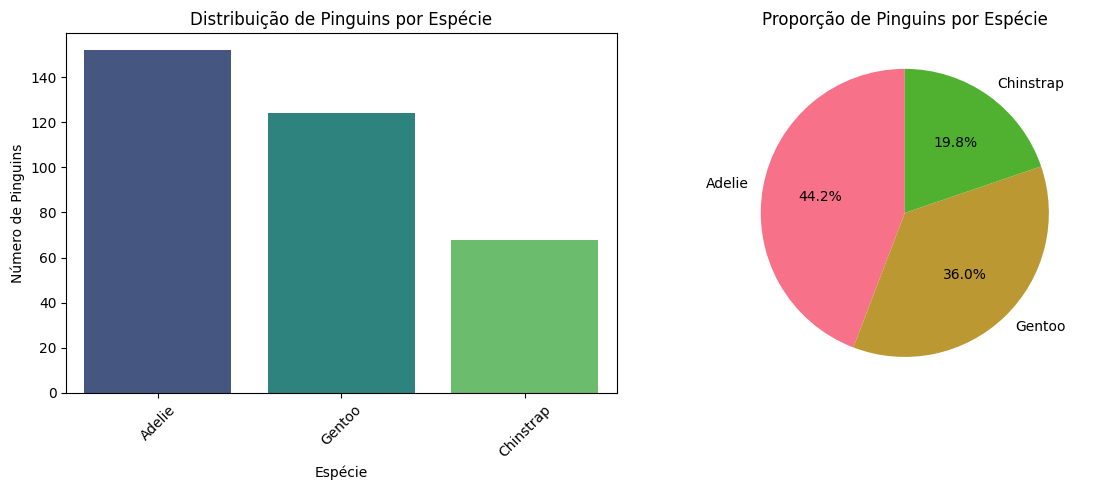

In [61]:
def especies_mais_frequentes(df):
    especies = df['Espece'].value_counts()
    print(f"3 - As espécies que a ONG mais possui são as espécies {especies.index[0]} com {especies.values[0]} animais, seguida por {especies.index[1]} com {especies.values[1]} animais e {especies.index[2]} com {especies.values[2]} animais.")
    return especies

distribuicao_especies = especies_mais_frequentes(df_pinguins)

# Visualização gráfica
# 1o gráfico

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df_pinguins, x='Espece', palette='viridis')
plt.title('Distribuição de Pinguins por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Número de Pinguins')
plt.xticks(rotation=45)

# 2o gráfico

plt.subplot(1, 2, 2)
plt.pie(distribuicao_especies.values, labels=distribuicao_especies.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Pinguins por Espécie')

plt.tight_layout()
plt.show()

## 6. Análise 4: Relação entre Medidas e Espécies

Vamos investigar se existe alguma relação entre as medidas dos pinguins e suas espécies.

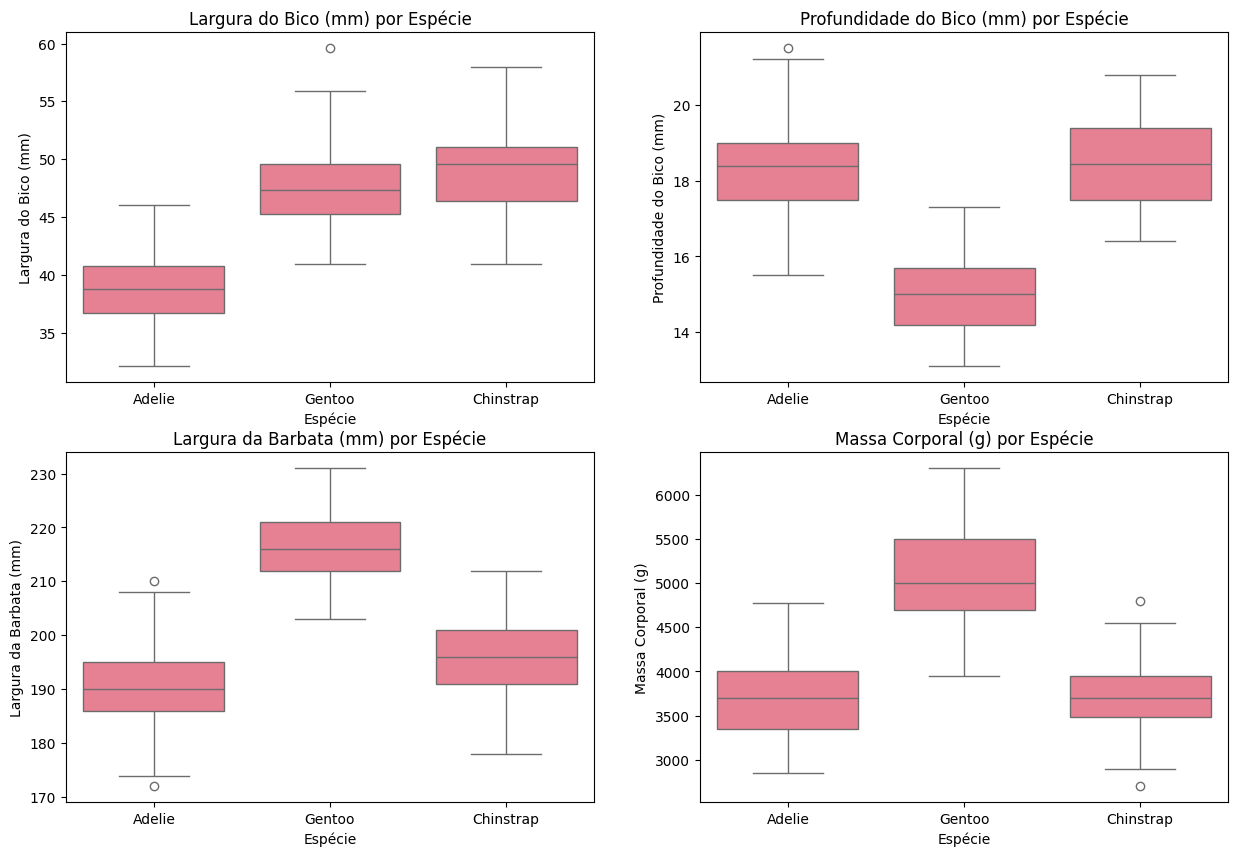

In [62]:
def relacao_medidas_especie(df):
    medidas = df.groupby('Espece').agg({'largura do bico': 'mean', 'profundidade do bico': 'mean', 'largura da barbata': 'mean', 'massa corporal': 'mean'})
    medidas = medidas.round(2)
    print("4 - Relação entre medidas e espécies (formatado para 2 casas decimais) em mm, mm, mm e g, respectivamente:")
    print(medidas)

# Visualização gráfica das medidas por espécie
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
medidas_cols = ['largura do bico', 'profundidade do bico', 'largura da barbata', 'massa corporal']
titles = ['Largura do Bico (mm)', 'Profundidade do Bico (mm)', 'Largura da Barbata (mm)', 'Massa Corporal (g)']

for i, (col, title) in enumerate(zip(medidas_cols, titles)):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df_pinguins, x='Espece', y=col, ax=ax)
    ax.set_title(f'{title} por Espécie')
    ax.set_xlabel('Espécie')
    ax.set_ylabel(title)

## 7. Análise 5: Relação entre Medidas, Sexo e Espécies

Vamos analisar se existe relação entre as medidas dos pinguins, seu sexo e espécie.

5 - Relação entre medidas, sexo e espécies (formatado para 2 casas decimais) em mm, mm, mm e g, respectivamente:


,Espece,sexo,largura do bico,profundidade do bico,largura da barbata,massa corporal
0,Adelie,female,37.26,17.62,187.79,3368.84
1,Adelie,male,40.39,19.07,192.41,4043.49
2,Chinstrap,female,46.57,17.59,191.74,3527.21
3,Chinstrap,male,51.09,19.25,199.91,3938.97
4,Gentoo,female,45.56,14.24,212.71,4679.74
5,Gentoo,male,49.47,15.72,221.54,5484.84


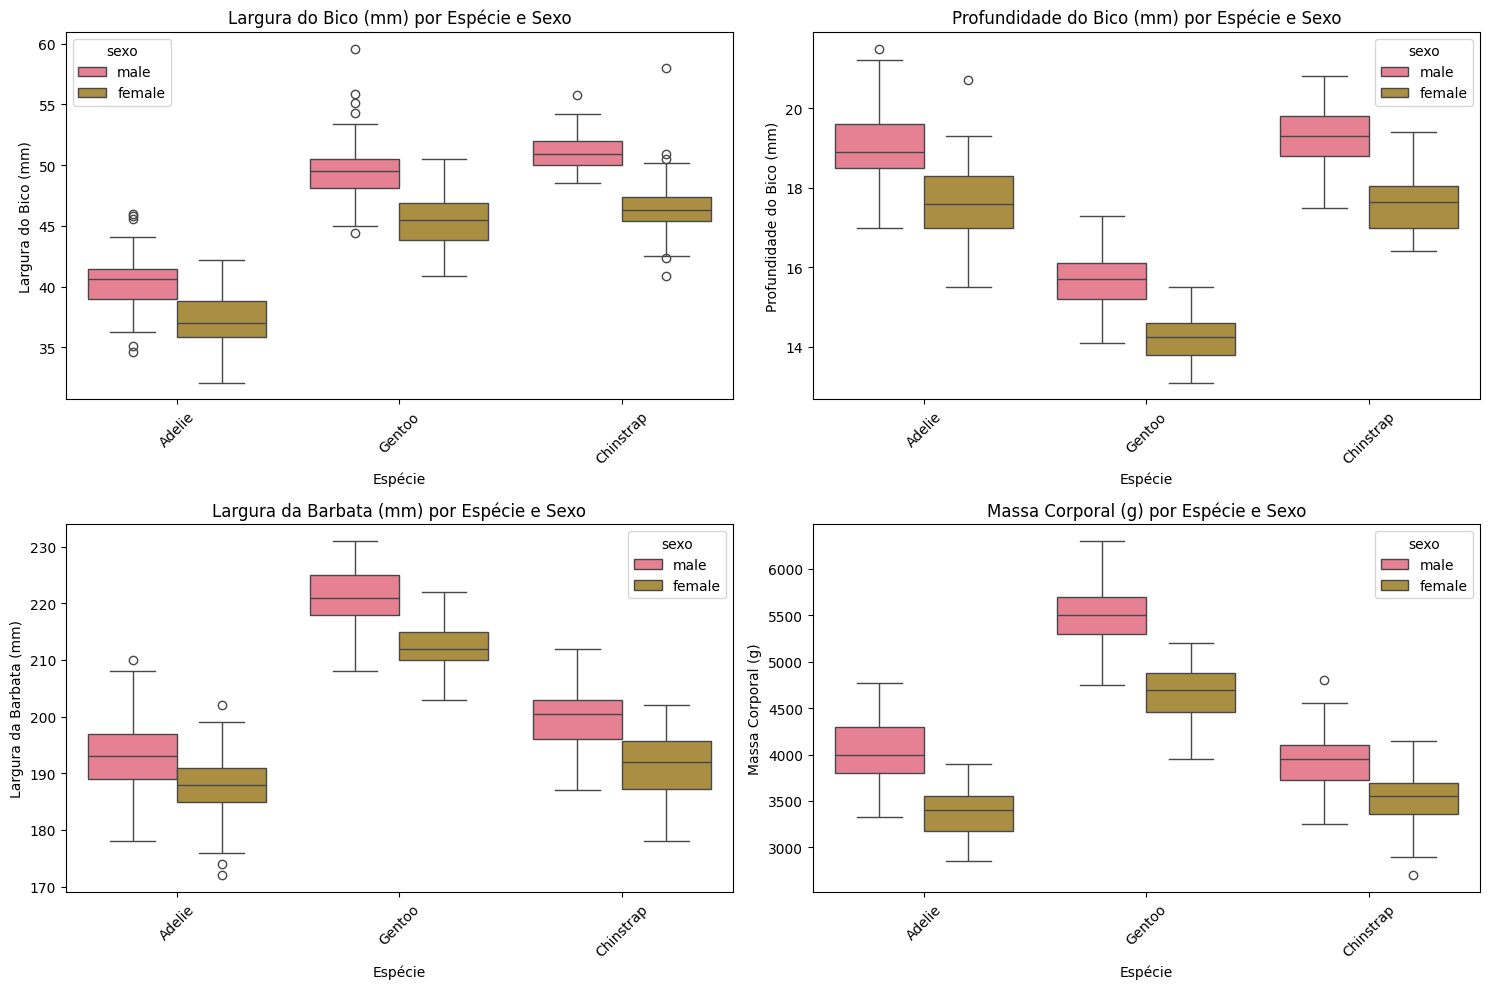

In [63]:
def relacao_medidas_sexo_especie(df):
    medidas_sexo = df.groupby(['Espece', 'sexo']).agg({
        'largura do bico': 'mean', 
        'profundidade do bico': 'mean', 
        'largura da barbata': 'mean', 
        'massa corporal': 'mean'
    })
    medidas_sexo = medidas_sexo.round(2)
    medidas_sexo = medidas_sexo.reset_index()
    print("5 - Relação entre medidas, sexo e espécies (formatado para 2 casas decimais) em mm, mm, mm e g, respectivamente:")
    display(medidas_sexo)
    return medidas_sexo

medidas_sexo_especie = relacao_medidas_sexo_especie(df_pinguins)

# Visualização gráfica das medidas por espécie e sexo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
medidas_cols = ['largura do bico', 'profundidade do bico', 'largura da barbata', 'massa corporal']
titles = ['Largura do Bico (mm)', 'Profundidade do Bico (mm)', 'Largura da Barbata (mm)', 'Massa Corporal (g)']

for i, (col, title) in enumerate(zip(medidas_cols, titles)):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df_pinguins, x='Espece', y=col, hue='sexo', ax=ax)
    ax.set_title(f'{title} por Espécie e Sexo')
    ax.set_xlabel('Espécie')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Execução de Todas as Análises

Vamos executar todas as análises de uma vez para ter um resumo completo.

In [64]:
def executar_analises(df):
    print("=== RESUMO DE TODAS AS ANÁLISES ===")
    print()
    linhas_com_dados_nulos(df)
    print()
    ilhas_mais_frequentes(df)
    print()
    especies_mais_frequentes(df)
    print()
    relacao_medidas_especie(df)
    print()
    relacao_medidas_sexo_especie(df)

executar_analises(df_pinguins)

=== RESUMO DE TODAS AS ANÁLISES ===

1 - As linhas [3, 8, 9, 10, 11, 47, 178, 218, 256, 268, 271] contém dados nulos (As linhas iniciam pelo número 0).

2 - As ilhas mais frequentes são Biscoe com 168 ocorrências, seguida por Dream com 124 ocorrências e Torgersen com 52 ocorrências.

3 - As espécies que a ONG mais possui são as espécies Adelie com 152 animais, seguida por Gentoo com 124 animais e Chinstrap com 68 animais.

4 - Relação entre medidas e espécies (formatado para 2 casas decimais) em mm, mm, mm e g, respectivamente:
           largura do bico  profundidade do bico  largura da barbata  \
Espece                                                                 
Adelie               38.79                 18.35              189.95   
Chinstrap            48.83                 18.42              195.82   
Gentoo               47.50                 14.98              217.19   

           massa corporal  
Espece                     
Adelie            3700.66  
Chinstrap         373

,Espece,sexo,largura do bico,profundidade do bico,largura da barbata,massa corporal
0,Adelie,female,37.26,17.62,187.79,3368.84
1,Adelie,male,40.39,19.07,192.41,4043.49
2,Chinstrap,female,46.57,17.59,191.74,3527.21
3,Chinstrap,male,51.09,19.25,199.91,3938.97
4,Gentoo,female,45.56,14.24,212.71,4679.74
5,Gentoo,male,49.47,15.72,221.54,5484.84


## 9. Conclusões

As análises foram realizadas com sucesso. As informações foram extraídas e apresentadas de forma clara, permitindo uma compreensão rápida dos dados dos pinguins.

### Principais descobertas:
- Identificamos as linhas com dados nulos no dataset.
- Analisamos a distribuição dos pinguins por ilha de origem.
- Determinamos quais espécies são mais frequentes na base de dados.
- Exploramos as relações entre medidas corporais e espécies.
- Investigamos como as medidas variam entre espécies e sexos.

### Observações técnicas:
- As funções foram organizadas para facilitar a leitura e a manutenção do código.
- O código foi escrito sem tratamento de erros extensivo, pois o objetivo é demonstrar a análise dos dados.
- Em um ambiente de produção, seria importante adicionar tratamento de erros para garantir a robustez do código.
- As visualizações adicionais com seaborn e matplotlib enriquecem a análise exploratória.